In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/king-county-pkl/kc_house_data.pkl


In [6]:
import pandas as pd

In [7]:
df=pd.read_pickle("../input/king-county-pkl/kc_house_data.pkl")

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/tmp/ipykernel_32/2475600934.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


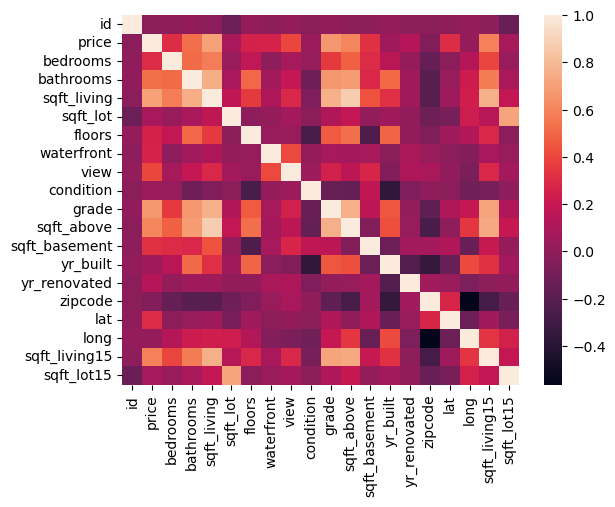

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df
sns.heatmap(df.corr())
plt.show()


In [10]:
df = df.drop('date', axis=1)

In [11]:
x=df.drop("price", axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [13]:
x=scaler.fit_transform(x)

In [14]:
y=df["price"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
import numpy as np


In [17]:
# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Drop rows with non-numeric values
df = df.dropna(subset=non_numeric_cols)


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=13)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
model=Sequential()
model.add(Dense(81,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(27,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [21]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128, epochs=450,verbose=1)

Epoch 1/450
136/136 [==============================] - 2s 4ms/step - loss: 426940923904.0000 - val_loss: 419113238528.0000
Epoch 2/450
136/136 [==============================] - 0s 3ms/step - loss: 346879492096.0000 - val_loss: 156177612800.0000
Epoch 3/450
136/136 [==============================] - 0s 3ms/step - loss: 107859902464.0000 - val_loss: 93464395776.0000
Epoch 4/450
136/136 [==============================] - 0s 2ms/step - loss: 98270461952.0000 - val_loss: 88564195328.0000
Epoch 5/450
136/136 [==============================] - 0s 2ms/step - loss: 93381320704.0000 - val_loss: 83463479296.0000
Epoch 6/450
136/136 [==============================] - 0s 3ms/step - loss: 88143380480.0000 - val_loss: 78020272128.0000
Epoch 7/450
136/136 [==============================] - 0s 3ms/step - loss: 82398666752.0000 - val_loss: 71802953728.0000
Epoch 8/450
136/136 [==============================] - 0s 3ms/step - loss: 75977965568.0000 - val_loss: 65104338944.0000
Epoch 9/450
136/136 [======

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                1620      
                                                                 
 dense_1 (Dense)             (None, 40)                3280      
                                                                 
 dense_2 (Dense)             (None, 27)                1107      
                                                                 
 dense_3 (Dense)             (None, 19)                532       
                                                                 
 dense_4 (Dense)             (None, 5)                 100       
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

<Axes: >

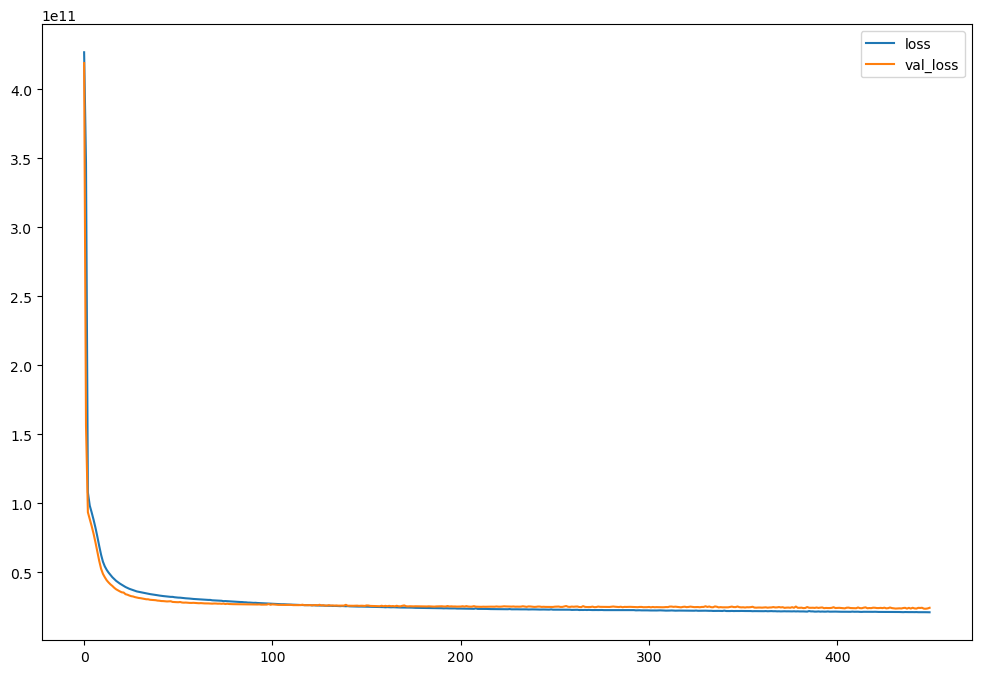

In [24]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [25]:
pred=model.predict(x_test)


136/136 [==============================] - 0s 1ms/step


In [26]:
(mean_squared_error(y_test,pred))**0.5

155583.94838473425

In [27]:
r2_score(y_test,pred)

0.8127209584280048